#  Life Expectancy and GDP Visualisation

This project aims to visualize and analyze the relationship between the economic output of the country and the life expectancy of its citizens for six nations on various stages of development. The project utilizes Python's Pandas, Matplotlib, and Seaborn libraries. The exploratory analysis will be based on descriptive statistics and various visualizations: histogram, bar, violin, scatter, and line plots. 

**Research Questions**: 
+ What is the distribution of the life expectancy and GDP in the six nations?
+ Has life expectancy increased over times?
+ Has GDP increased over time?
+ Is there a correlation between GDP and life expectancy of a country?
+ How can we explain the relationship?

The dataset was shortned and prepeared for educational purposes by Codecademy.

GDP Source: <a href='https://data.worldbank.org/indicator/NY.GDP.MKTP.CD'>World Bank</a> national accounts data, and OECD National Accounts data files.
Life expectancy Data Source: <a href='http://apps.who.int/gho/data/node.main.688'>World Health Organization</a>

## Import Python Modules and Prep the Data

In [114]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [206]:
df = pd.read_csv("all_data.csv")

Alternatively, data can be downloaded from the World Bank directly.

In [207]:
from pandas_datareader import wb
data = wb.download(country=['MEX','DEU','CHN','USA','CHL','ZMB'], indicator=['6.0.GDP_current'], start=2000, end=2015)
data.head()

6.0.GDP_current
country year                 
Chile   2014     2.580615e+11
        2013     2.766737e+11
        2012     2.652316e+11
        2011     2.508324e+11
        2010     2.175383e+11

Hovewer, for the purpuses of this study project the prepared data will be used.

In [208]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


`Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. It would be also easier to work with lowercase column names.

In [209]:
df.columns = ['country','year','leaby','gdp']

`GDP` is so large, Pandas uses scientific notation to display it. Let's store it in billions and rename the column to reflect that.

In [210]:
df['gdp'] = df['gdp'] / 10**9
df.rename(columns={"gdp": "gdp_b"},inplace=True)

## Examine The Data

In [211]:
#examine the countries
df['country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [212]:
#examine the time pframe
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

The dataset for this project includes information about six countries on various stages of development and from all continents. The time period is 15 years from 2000  to 2015.

In [213]:
df.describe()

,year,leaby,gdp_b
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.498571
std,4.633971,10.672882,5197.561311
min,2000.000000,44.300000,4.415703
25%,2003.750000,74.475000,173.301750
50%,2007.500000,76.750000,1280.220000
75%,2011.250000,78.900000,4067.510000
max,2015.000000,81.000000,18100.000000


In [214]:
df[['leaby','country','gdp_b']].groupby(['country']).describe()

leaby                                           \
                         count      mean       std   min     25%    50%   
country                                                                   
Chile                     16.0  78.94375  1.058911  77.3  77.975  79.00   
China                     16.0  74.26250  1.318016  71.7  73.400  74.45   
Germany                   16.0  79.65625  0.975000  78.0  78.950  79.85   
Mexico                    16.0  75.71875  0.620987  74.8  75.225  75.65   
United States of America  16.0  78.06250  0.832566  76.8  77.425  78.15   
Zimbabwe                  16.0  50.09375  5.940311  44.3  45.175  47.40   

                                       gdp_b                             \
                             75%   max count          mean          std   
country                                                                   
Chile                     79.825  80.5  16.0    169.788845    76.878841   
China                     75.250  76.1  16.0   4957.713750  3501.095795   
Germany                   80.525  81.0  16.0   3094.775625   667.486248   
Mexico                    76.150  76.7  16.0    976.650625   209.571645   
United States of America  78.725  79.3  16.0  14075.000000  2432.693980   
Zimbabwe                  55.325  60.7  16.0      9.062580     4.298310   

                                                                    \
                                   min           25%           50%   
country                                                              
Chile                        69.736811     93.873028    172.997500   
China                      1211.350000   1881.585000   4075.195000   
Germany                    1949.950000   2740.870000   3396.350000   
Mexico                      683.648000    763.091000   1004.375500   
United States of America  10300.000000  12100.000000  14450.000000   
Zimbabwe                      4.415703      5.748309      6.733671   

                                                      
                                   75%           max  
country                                               
Chile                       244.951500    278.384000  
China                      7819.550000  11064.700000  
Germany                    3596.077500   3890.610000  
Mexico                     1156.992500   1298.460000  
United States of America  15675.000000  18100.000000  
Zimbabwe                     12.634461     16.304668

In [215]:
df[df['year'] == 2015]

,country,year,leaby,gdp_b
15,Chile,2015,80.5,242.518000
31,China,2015,76.1,11064.700000
47,Germany,2015,81.0,3375.610000
63,Mexico,2015,76.7,1152.260000
79,United States of America,2015,79.3,18100.000000
95,Zimbabwe,2015,60.7,16.304668


In [216]:
df[df['year'] == 2015].describe()

,year,leaby,gdp_b
count,6.0,6.000000,6.000000
mean,2015.0,75.716667,5658.565445
std,0.0,7.619033,7358.028752
min,2015.0,60.700000,16.304668
25%,2015.0,76.250000,469.953500
50%,2015.0,78.000000,2263.935000
75%,2015.0,80.200000,9142.427500
max,2015.0,81.000000,18100.000000


#### Findings

The lowest recorded life expectancy during this time period was 44.3 years in Zimbabwe, the highest is 81 in Germany. The average life expectancy for 15 years was approximately 73 years.

The lowest recorded GDP was 4.4 billion dollars in Zimbabwe, the highest is 18,100 billion in the USA.
The average GDP over 15 years was approximately 3,880 billion dollars.

There was more variation between GDP than between life expectancy in different countries if we compare the standard deviation. The standard deviation for life expectancy was 10,7 (which is approximately 15% of the mean) and the standard deviation for GDP was 3880,5 (which is approximately 134% of the mean).

---

## Average GDP and Life Expectancy

Text(0.5, 1.0, 'Life expectancy at birth, years')

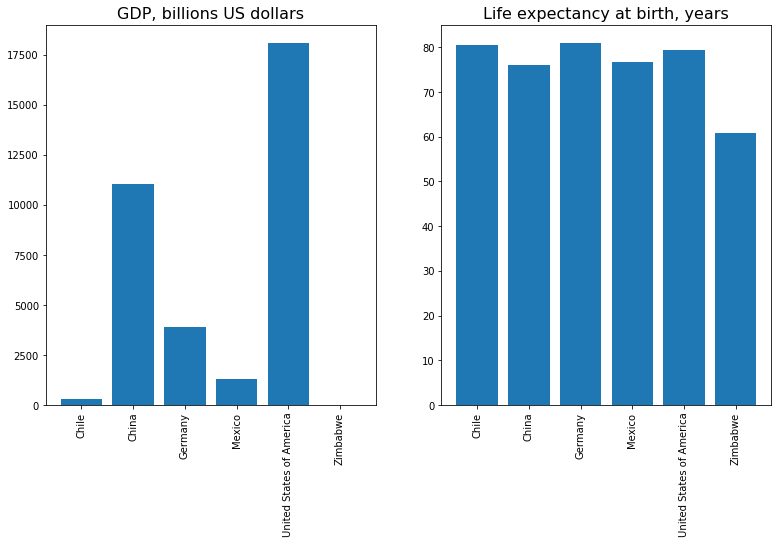

In [97]:
fig = plt.figure(figsize=(13,7))

plt.subplot(1,2,1)

plt.bar(df['country'],df['gdp_b'])
plt.xticks(rotation='vertical')
plt.title("GDP, billions US dollars", fontsize=16)

plt.subplot(1,2,2)

plt.bar(df['country'],df['leaby'])
plt.xticks(rotation='vertical')
plt.title("Life expectancy at birth, years", fontsize=16)

#### Findings
Visualization reaffirms the previous finding that the differences in GDP between countires are much more drastic than in Life expectancy at birth.

## Gross Domestic Product

Text(0.5, 0, 'GDP in Billions of U.S. Dollars')

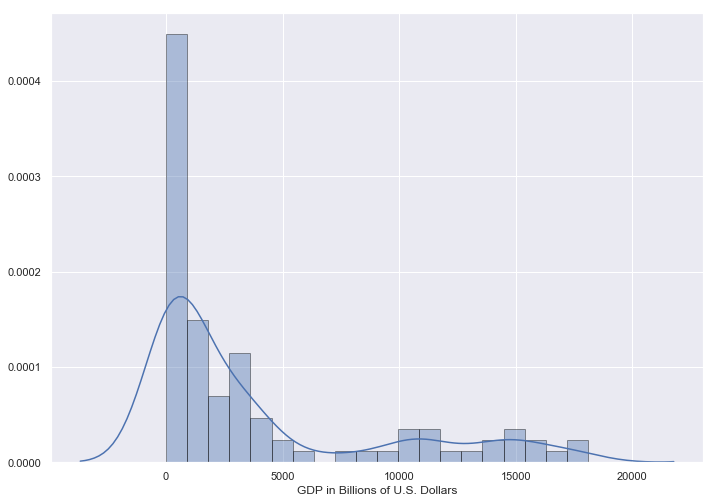

In [185]:
#plot density plot and histogram using seaborn

sns.distplot(df['gdp_b'], bins=20, hist=True, hist_kws={'edgecolor':'black'})
plt.xlabel("GDP in Billions of U.S. Dollars")

GDP distribution for all countries is right skewed. 

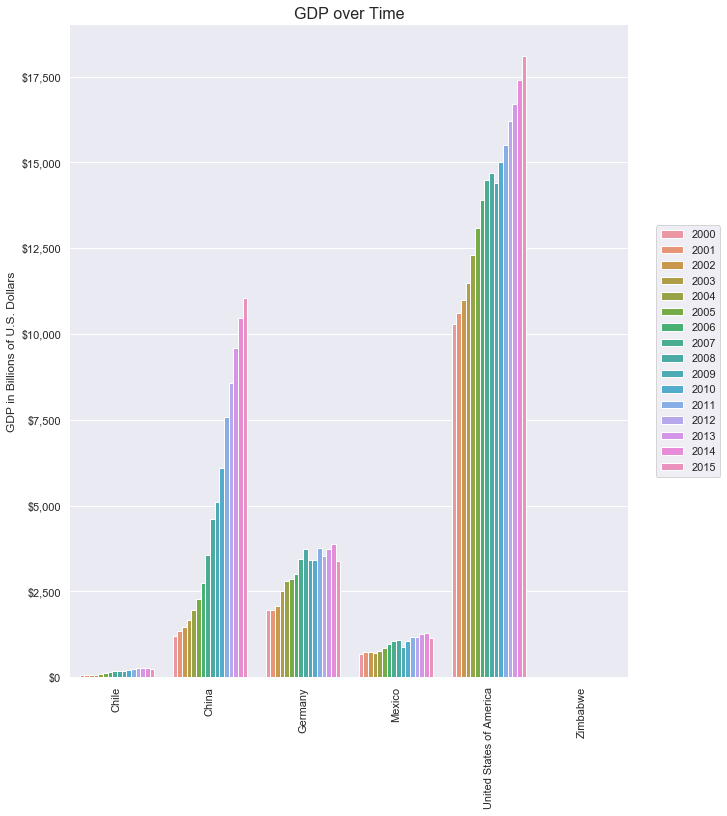

In [186]:
f, ax = plt.subplots(figsize=(10, 12)) 
ax = sns.barplot(x="country", y="gdp_b", hue="year", data=df)

#format x-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.xticks(rotation=90)
plt.ylabel("GDP in Billions of U.S. Dollars")
plt.xlabel('')
plt.title("GDP over Time", fontsize=16)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
sns.despine(bottom = True, left = True)  

Changes in Chile and Zimbabwe are not visible, let's plot them seperatly.

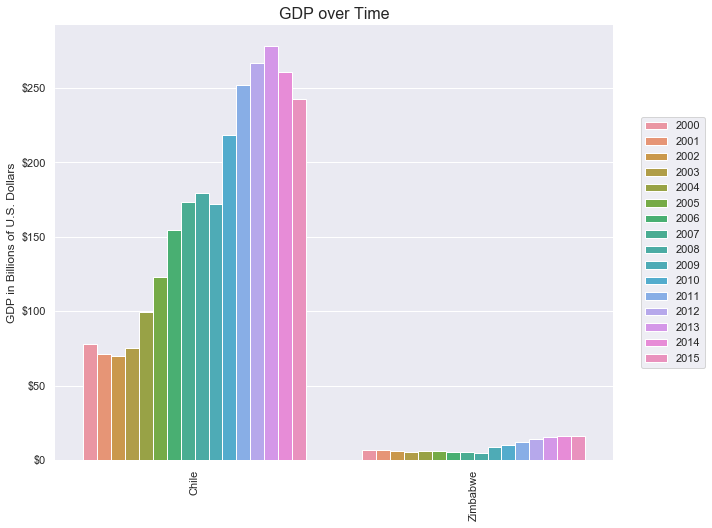

In [187]:
f, ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="country", y="gdp_b", hue="year", data=df[(df['country']=='Chile') | (df['country']=='Zimbabwe')])

#format x-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.xticks(rotation=90)
plt.ylabel("GDP in Billions of U.S. Dollars")
plt.xlabel('')
plt.title("GDP over Time", fontsize=16)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
sns.despine(bottom = True, left = True)  

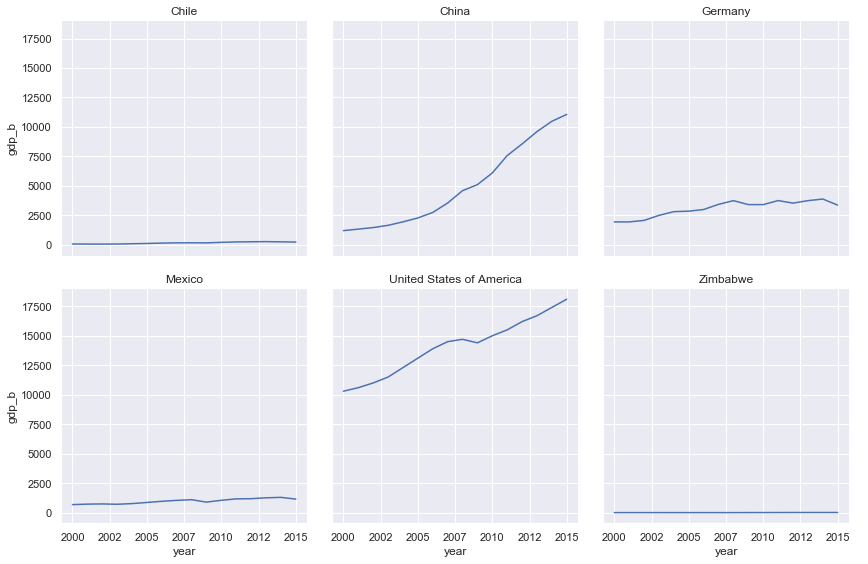

In [188]:
g1 = sns.FacetGrid(df, col="country", col_wrap=3, height=4)
g1 = (g1.map(plt.plot, "year", "gdp_b").add_legend().set_titles("{col_name}").set_xticklabels(['','2000','2002','2005','2007','2010','2012','2015']))

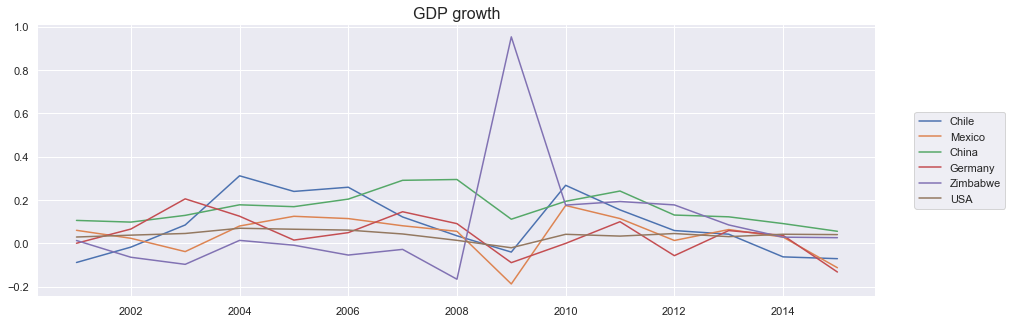

In [190]:
plt.figure(figsize=(15,5))

plt.plot(df['year'][df['country']=='Chile'], df['gdp_b'][df['country']=='Chile'].pct_change(), label='Chile')
plt.plot(df['year'][df['country']=='Mexico'], df['gdp_b'][df['country']=='Mexico'].pct_change(), label='Mexico')
plt.plot(df['year'][df['country']=='China'], df['gdp_b'][df['country']=='China'].pct_change(), label='China')
plt.plot(df['year'][df['country']=='Germany'], df['gdp_b'][df['country']=='Germany'].pct_change(), label='Germany')
plt.plot(df['year'][df['country']=='Zimbabwe'], df['gdp_b'][df['country']=='Zimbabwe'].pct_change(), label='Zimbabwe')
plt.plot(df['year'][df['country']=='United States of America'], df['gdp_b'][df['country']=='United States of America'].pct_change(), label='USA')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title("GDP growth", fontsize=16)
sns.despine(bottom = True, left = True)  

#### Findings

Every country experienced economic growth if we compare GDP in 2000 and 2015. However, this growth was not linear and not always positive as well. Only one country — China — showed only positive growth during these 15 years. 

The economic growth of Zimbabwe, Chile, and Mexico was slower and smaller than those of China, the USA, and Germany.

## Life Expectancy ar Birth

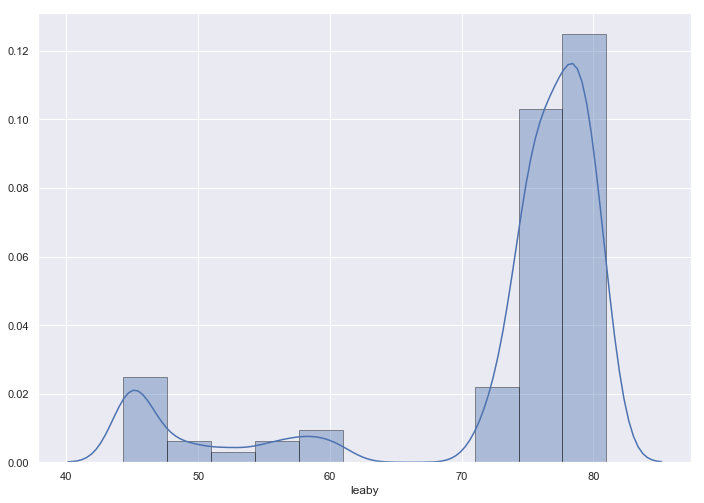

In [191]:
#plot density plot and histogram using seaborn

sns.distplot(df['leaby'], bins=11, hist=True, hist_kws={'edgecolor':'black'})

Distribution of life expectancy at birth for all countries is left skewed with two clusters.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

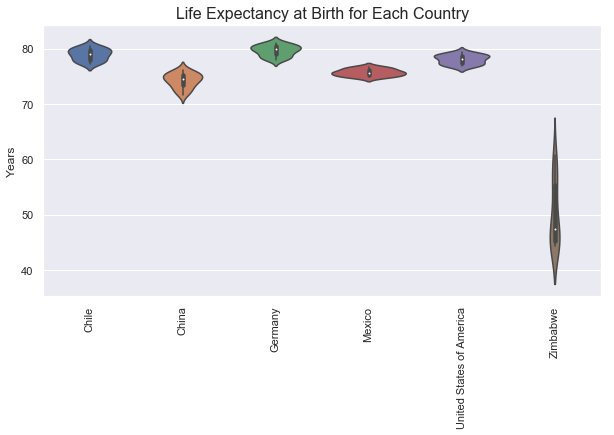

In [203]:
fig = plt.subplots(figsize=(10,5)) 
sns.violinplot(data=df,x='country',y='leaby')
plt.title("Life Expectancy at Birth for Each Country", fontsize=16)
plt.xlabel('')
plt.ylabel('Years')
plt.xticks(rotation=90)

#### Findings
Life expectancy changed in every country with Zimbabwe having the most visible change and Mexico the least. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

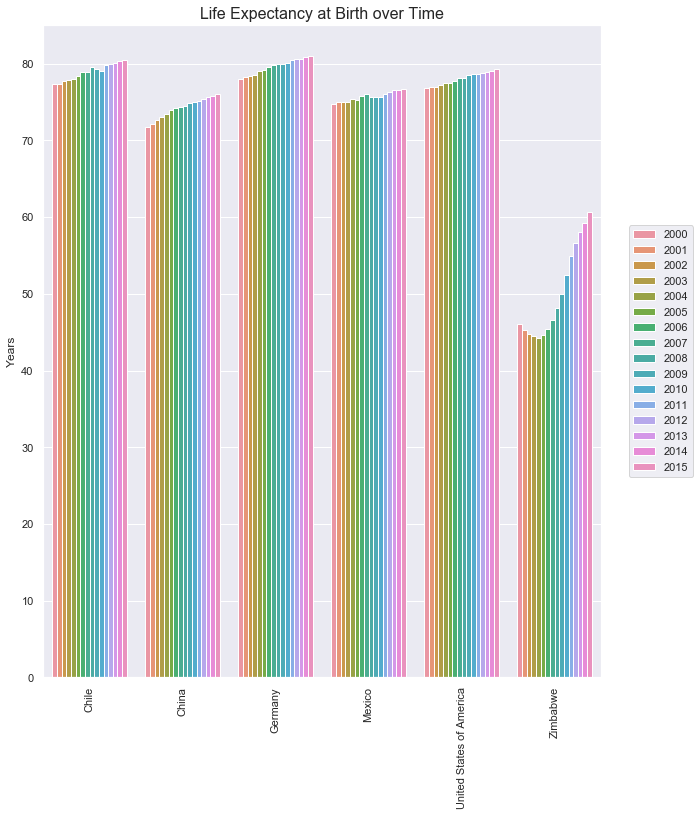

In [193]:
f, ax = plt.subplots(figsize=(10, 12)) 
ax = sns.barplot(x="country", y="leaby", hue="year", data=df)

plt.title("Life Expectancy at Birth over Time", fontsize=16)
plt.xlabel('')
plt.ylabel('Years')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xticks(rotation=90)

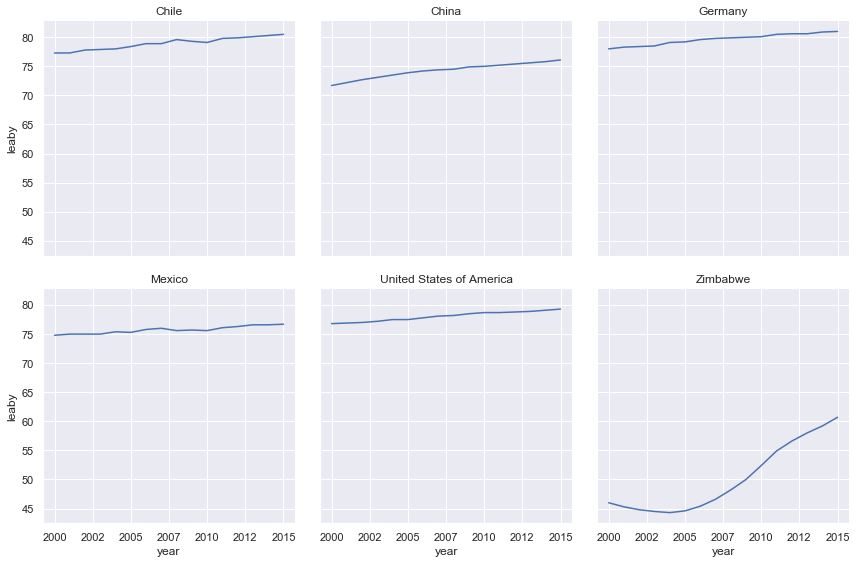

In [194]:
g2 = sns.FacetGrid(df, col="country", col_wrap=3, height=4)
g2 = (g2.map(plt.plot, "year", "leaby").add_legend().set_titles("{col_name}").set_xticklabels(['','2000','2002','2005','2007','2010','2012','2015']))

Text(0.5, 1.0, 'Life Expectancy Growth')

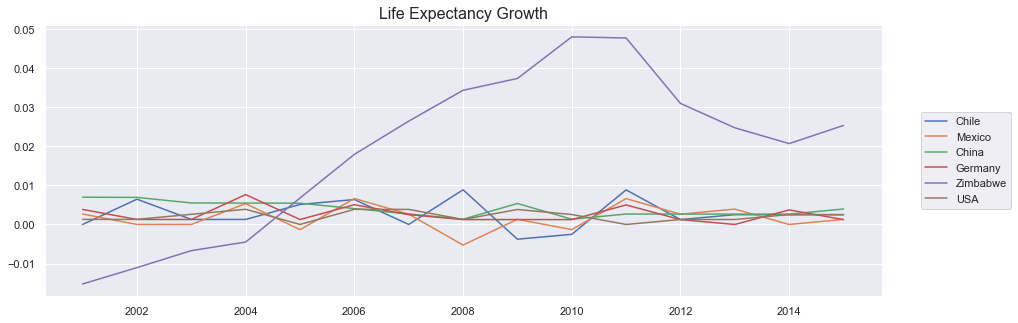

In [195]:
plt.figure(figsize=(15,5))

plt.plot(df['year'][df['country']=='Chile'], df['leaby'][df['country']=='Chile'].pct_change(), label='Chile')
plt.plot(df['year'][df['country']=='Mexico'], df['leaby'][df['country']=='Mexico'].pct_change(), label='Mexico')
plt.plot(df['year'][df['country']=='China'], df['leaby'][df['country']=='China'].pct_change(), label='China')
plt.plot(df['year'][df['country']=='Germany'], df['leaby'][df['country']=='Germany'].pct_change(), label='Germany')
plt.plot(df['year'][df['country']=='Zimbabwe'], df['leaby'][df['country']=='Zimbabwe'].pct_change(), label='Zimbabwe')
plt.plot(df['year'][df['country']=='United States of America'], df['leaby'][df['country']=='United States of America'].pct_change(), label='USA')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title("Life Expectancy Growth", fontsize=16)

#### Findings 

Every country experienced growth in life expectancy. The life expectancy of Zimbabweans experienced faster growth compared to other countries, but it still 15-20 years less than those of other countries. It is also the only country which had a decline in life expectancy during the time period.

## Relationship between GDP and Life Expectancy 

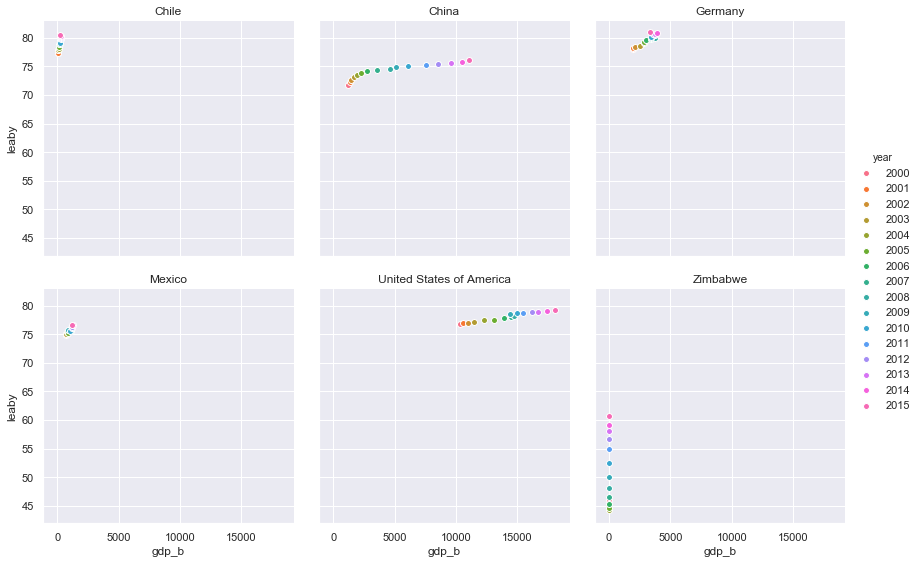

In [196]:
g = sns.FacetGrid(df, col='country', hue='year', col_wrap=3, height=4)
g = (g.map(plt.scatter, 'gdp_b', 'leaby', edgecolor="w").add_legend().set_titles("{col_name}"))

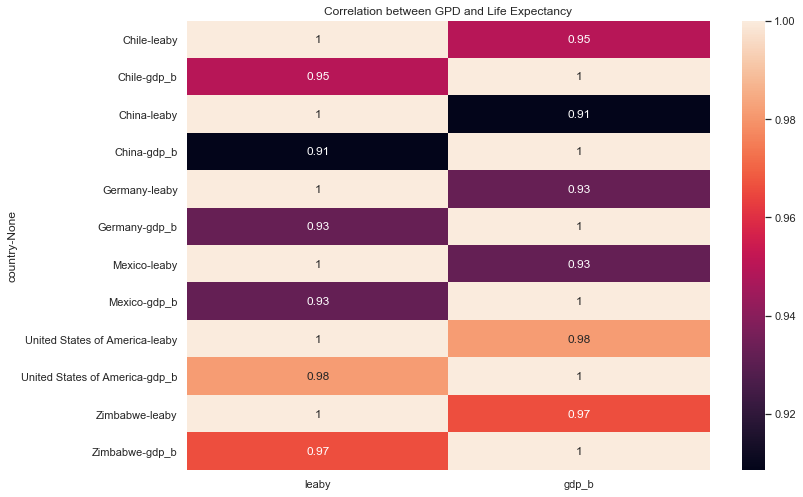

In [197]:
correlation_matrix = df[['leaby','country','gdp_b']].groupby(['country']).corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Correlation between GPD and Life Expectancy')
plt.show()

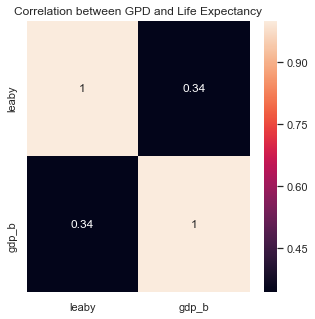

In [181]:
correlation_matrix = df[['leaby','gdp_b']].corr()

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Correlation between GPD and Life Expectancy')
plt.show()

#### Findings

GDP and life expectancy are strongly and positively correlated in each country. Countries with high economic output have a high life expectancy. We also see a general trend that with more economic growth we see a growth of life expectancy. 

However, the fastest growth in life expectancy experienced a country with the least economic growth. And no matter how much higher was the economic output of China and the United States, they could not exсeed the maximum life expectancy of Germany. 

Given this limited data, we can assume that changes life expectancy could be more explained, for example, by shared medical knowledge of human civilization. Developed countries enjoy higher life expectancy, but they can not increase in by driving economic output higher and higher. However, low-income countries have 'more room' to grow, improving the economy could help them develop their healthcare systems, and even little increase in economic output could facilitate a considerable increase in life expectancy.